# [2.X코드반영] Lab 04: Multi-variable Linear Regression 를 TensorFlow 로 구현하기

In [6]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.1


## Without Matrix

In [5]:
# 입력 데이터/data
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]

# 정답 /label
Y = [152., 185., 180., 196., 142.]

# 임의 가중치, 초기화 1
w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001


# weight 1001번 업데이트
for i in range(1000+1):
  # Gradient descent 학습, 변수 정보 tape에 저장
  with tf.GradientTape() as tape:
    # 가설 함수
    hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
    # 오차 제곱의 평균값
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
  
  # tape의 gradient 호출해서 네 개의 변수에 대한 기울기 값을 구한다.
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1,w2,w3,b])

  # w1 update = w1 - gradient * learging rate
  w1.assign_sub(learning_rate*w1_grad)
  w2.assign_sub(learning_rate*w2_grad)
  w3.assign_sub(learning_rate*w3_grad)
  b.assign_sub(learning_rate*b_grad)

  if i % 50 == 0:
    print('{:5} | {:12.4f}'.format(i, cost.numpy()))

    0 |   14146.9375
   50 |     159.9380
  100 |       4.7372
  150 |       3.0144
  200 |       2.9945
  250 |       2.9936
  300 |       2.9929
  350 |       2.9922
  400 |       2.9915
  450 |       2.9908
  500 |       2.9901
  550 |       2.9894
  600 |       2.9888
  650 |       2.9881
  700 |       2.9874
  750 |       2.9867
  800 |       2.9860
  850 |       2.9853
  900 |       2.9846
  950 |       2.9839
 1000 |       2.9832


cost 점점 적게 줄어든다.

# With Matrix

In [10]:
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

X = data[:,:-1]
y = data[:, [-1]]

# row = 3, column = 1
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

def predict(X):
  # X와 w 매트리스 곱합
  return tf.matmul(X,W)+b

n_epochs = 2000

# weight 2001번 업데이트
for i in range(n_epochs+1):

  # Gradient descent 학습, 변수 정보 tape에 저장
  with tf.GradientTape() as tape:
    # 오차 제곱의 평균값
    cost = tf.reduce_mean(tf.square(predict(X) - y))
  
  # tape의 gradient 호출해서 네 개의 변수에 대한 기울기 값을 구한다.
  W_grad, b_grad = tape.gradient(cost, [W, b])

  # w1 update = w1 - gradient * learging rate
  W.assign_sub(learning_rate*W_grad)
  b.assign_sub(learning_rate*b_grad)

  if i % 100 == 0:
    print('{:5} | {:10.4f}'.format(i, cost.numpy()))

    0 | 22660.1133
  100 |     6.4487
  200 |     3.6573
  300 |     3.6546
  400 |     3.6523
  500 |     3.6500
  600 |     3.6476
  700 |     3.6453
  800 |     3.6430
  900 |     3.6407
 1000 |     3.6384
 1100 |     3.6360
 1200 |     3.6337
 1300 |     3.6314
 1400 |     3.6292
 1500 |     3.6269
 1600 |     3.6246
 1700 |     3.6224
 1800 |     3.6201
 1900 |     3.6179
 2000 |     3.6157


최적화 빠르게 이뤄짐

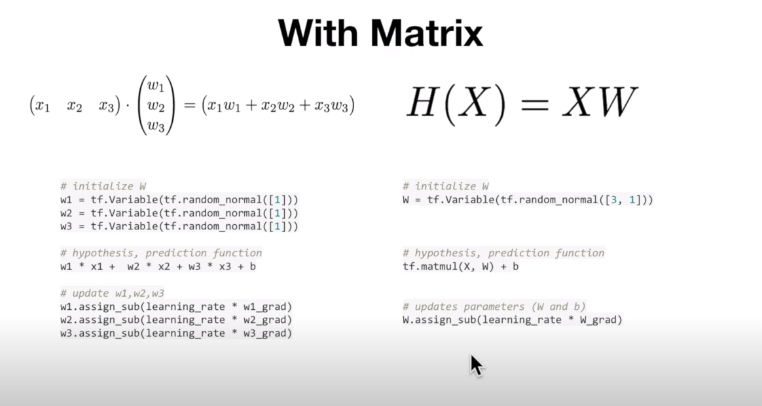

Matrix 사용하면 w와 b 간편하게 표기 가능하고 성능 면에서도 유리하다.